# DAY-2
# TASK-1: Data Cleaning, find count of missing values in each column, describe the dataset (mean,median etc ).

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# url = "https://docs.google.com/spreadsheets/d/1GcYSfR0ox26Tc-7-8AhLA3Pgx2X1o9IKK-WDL5rDNa4/edit#gid=1426969578"
data = pd.read_csv('train - train (2).csv')
data.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [3]:
data.shape

(31527, 11)

In [4]:
# collecting info about data, how many null or non-null values, what's the data type of the parameters
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
# data['year'] = data['year'].astype(float)

In [6]:
# get the number of missing data points per column
data.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

In [7]:
newdata = data

In [8]:
# removing the unnamed column because it has no use in the problem
newdata.drop("Unnamed: 0", axis = 1, inplace=True)
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


### Correcting and cleaning the column - year

In [9]:
newdata.loc[1,'year'] = 2013  # Here I have corrected the wrong data given at row1 in the year column.

data['year'] = pd.to_numeric(data['year']) # as from above info function, the year has object datatype 
# but its not  possible so I have changed it to float.

newdata['year'].isnull().sum() # now again checking the null values in year

15

In [10]:
newdata['year'].interpolate(method='linear', direction='both', inplace=True) # as there are 15 null values, therefore
# I am interpolating them.

newdata['year'].isnull().sum()

# or
# newdata['year'].select_dtypes(include='int64').interpolate(method='linear', direction='both', inplace=True)

0

### Correcting and cleaning the column - rain

In [11]:
# using interpolation method to fill the NAN values, it will fill by finding the mean of just one above and one below data.
newdata['rain'].interpolate(method='linear', direction='both', inplace=True)

### Correcting and cleaning the column - pressure

In [12]:
newdata.loc[0,'pressure'] = 1023.7
data['pressure'] = pd.to_numeric(data['pressure'])


newdata['pressure'].interpolate(method='linear', direction='both', inplace=True)
newdata['pressure'].isnull().sum()

0

**Similarly for other parameters we are correcting and filling the null values**

In [13]:
newdata.loc[0,'month'] = 3
newdata.loc[1,'month'] = 3
newdata['month'].interpolate(method='linear', direction='both', inplace=True)


newdata['day'].interpolate(method='linear', direction='both', inplace=True)
newdata['hour'].interpolate(method='linear', direction='both', inplace=True)
newdata['PM2.5'].interpolate(method='linear', direction='both', inplace=True)
newdata['temperature'].interpolate(method='linear', direction='both', inplace=True)
newdata['wind_speed'].interpolate(method='linear', direction='both', inplace=True)

In [14]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31527 non-null  float64
 1   month           31527 non-null  float64
 2   day             31527 non-null  float64
 3   hour            31527 non-null  float64
 4   PM2.5           31527 non-null  float64
 5   temperature     31527 non-null  float64
 6   pressure        31527 non-null  float64
 7   rain            31527 non-null  float64
 8   wind_direction  31467 non-null  object 
 9   wind_speed      31527 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.4+ MB


**So finally we have change the Dtype of parameter to their correct type.**

In [15]:
newdata.isna().sum()

year               0
month              0
day                0
hour               0
PM2.5              0
temperature        0
pressure           0
rain               0
wind_direction    60
wind_speed         0
dtype: int64

**And also we have filled and clean the wrong and null values.**

In [16]:
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,3.0,1.0,0.0,4.0,-0.7,1023.7,0.0,NNW,4.4
1,2013.0,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.0
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


## Describing the data

In [17]:
newdata.describe()
# from this method we can find mean of each data, standard deviation, minimum and maximum values and percentiles.
# (Percentiles give you a number that describes the value that a given percent of the values are lower than.)

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
count,31527.000000,31527.000000,31527.000000,31527.000000,3.152700e+04,31527.000000,31527.000000,31527.000000,31527.000000
mean,2014.516827,6.453167,15.411076,11.287785,2.094761e+03,14.354617,1010.804234,0.071716,1.697326
std,1.105097,3.309035,33.130093,37.122567,3.574293e+05,11.297708,38.859120,0.949540,1.338809
min,2013.000000,1.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,-5646.000000,0.000000,-79.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,1002.700000,0.000000,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,1010.300000,0.000000,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,1019.000000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,6.346466e+07,40.500000,1042.000000,72.500000,11.200000


### Finding median of each parameter

In [18]:
print("year_median =", np.median(newdata['year']))
print("month_median =", np.median(newdata['month']))
print("day_median =", np.median(newdata['day']))
print("hour_median = ", np.median(newdata['hour']))
print("PM2.5_median =", np.median(newdata['PM2.5']))
print("temperature_median =", np.median(newdata['temperature']))
print("pressure_median =", np.median(newdata['pressure']))
print("rain_median =", np.median(newdata['rain']))
print("wind_speed_median =", np.median(newdata['wind_speed']))

year_median = 2015.0
month_median = 6.0
day_median = 15.0
hour_median =  11.0
PM2.5_median = 58.0
temperature_median = 15.8
pressure_median = 1010.3
rain_median = 0.0
wind_speed_median = 1.4


### Finding Mode

In [19]:
from scipy import stats
print("year_mode =", stats.mode(newdata['year']))
print("month_mode =", stats.mode(newdata['month']))
print("day_mode =", stats.mode(newdata['day']))
print("hour_mode = ", stats.mode(newdata['hour']))
print("PM2.5_mode =", stats.mode(newdata['PM2.5']))
print("temperature_mode =", stats.mode(newdata['temperature']))
print("pressure_mode =", stats.mode(newdata['pressure']))
print("rain_mode =", stats.mode(newdata['rain']))
print("wind_direction_mode =", stats.mode(newdata['wind_direction']))
print("wind_speed_mode =", stats.mode(newdata['wind_speed']))

year_mode = ModeResult(mode=array([2015.]), count=array([8544]))
month_mode = ModeResult(mode=array([5.]), count=array([2954]))
day_mode = ModeResult(mode=array([4.]), count=array([1069]))
hour_mode =  ModeResult(mode=array([5.]), count=array([1335]))
PM2.5_mode = ModeResult(mode=array([9.]), count=array([538]))
temperature_mode = ModeResult(mode=array([3.]), count=array([237]))
pressure_mode = ModeResult(mode=array([1019.]), count=array([216]))
rain_mode = ModeResult(mode=array([0.]), count=array([30217]))
wind_direction_mode = ModeResult(mode=array(['NE'], dtype=object), count=array([4465]))
wind_speed_mode = ModeResult(mode=array([1.2]), count=array([1681]))


## Now, as wind_direction has still null values and its Dtype is object. Also from mode value of wind_direction we can see that it has NE as most repeated.
## So let's fill the null values with NE using fillna method.

In [20]:
newdata['wind_direction'].fillna("NE", inplace=True)
# newdata['wind_direction'].interpolate(method='linear', direction='both', inplace=True)

In [21]:
newdata.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64

# So finally our dataset is cleaned and corrected.

In [22]:
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,3.0,1.0,0.0,4.0,-0.7,1023.7,0.0,NNW,4.4
1,2013.0,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.0
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


# DAY 3-4
# TASK-2:     
1. Find outliers and fix or remove them. Mention the methods and explain how did you find the outliers. Also, give reason that why have you removed or fixed the values of the outliers.

2. Analyse each column with every other coulmn and find the relationship between the two columns. This can be done using various plots/graphs.

3. Find the correlation of PM2.5 with rest of the coulmns using correlation matrix and then visulaize the correlation matrix using heatmap.

4. Perform various plots like:- scatter plots, lm plots, bar plots, pie plots etc according to the values in the columns. Keep in mind that you don't need to plot every type of plots, plot only the ones you think are suitable for a column.

5. Plot box plot for every column and write your observations that you observed from the box plot.

6. Find how PM2.5 is getting affected by other coulmns.


**An OUTLIER is a data point in the dataset which lies outside of other observations, and it produces through mistakes or variance.**

### FINDING OUTLIERS
##### Here, to find them I will use the BOX PLOT  method, in which I will vizualise graphically by making boxes with the help of seaborn.


<AxesSubplot:xlabel='year'>

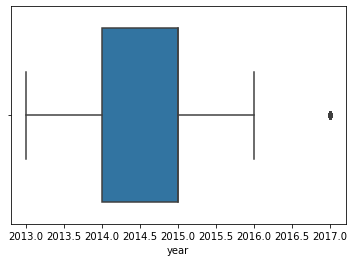

In [23]:
import seaborn as sns
sns.boxplot(x=newdata['year'])

***we can observe that there is only one outlier beyond 2017, but its out of index.***

<AxesSubplot:xlabel='month'>

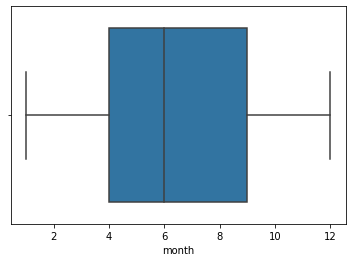

In [24]:
sns.boxplot(x=newdata['month'])

***Here, we can observe that there is no outlier in month column.***

<AxesSubplot:xlabel='day'>

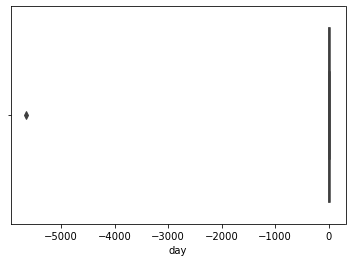

In [25]:
sns.boxplot(x=newdata['day'])

<AxesSubplot:xlabel='hour'>

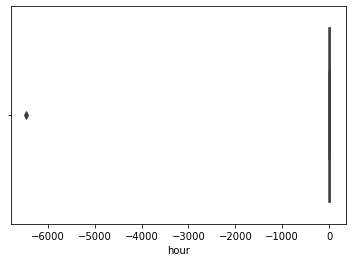

In [26]:
sns.boxplot(x=newdata['hour'])

<AxesSubplot:xlabel='PM2.5'>

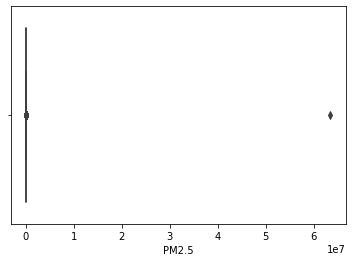

In [27]:
sns.boxplot(x=newdata['PM2.5'])

<AxesSubplot:xlabel='temperature'>

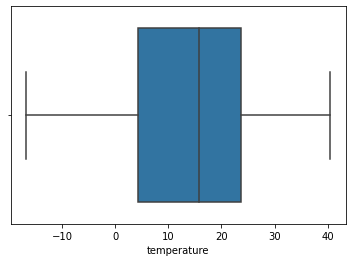

In [28]:
sns.boxplot(x=newdata['temperature'])

<AxesSubplot:xlabel='pressure'>

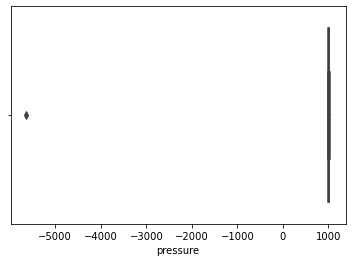

In [29]:
sns.boxplot(x=newdata['pressure'])

<AxesSubplot:xlabel='rain'>

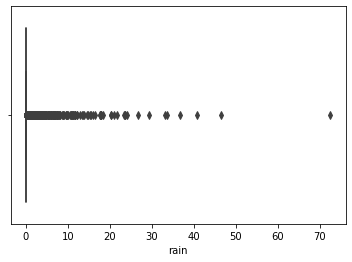

In [30]:
sns.boxplot(x=newdata['rain'])

**We can observe that there are lots of outliers in the rain column**

In [31]:
# sns.boxplot(x=newdata['wind_direction])

# it will throw error because the dtype of wind_direction is object

<AxesSubplot:xlabel='wind_speed'>

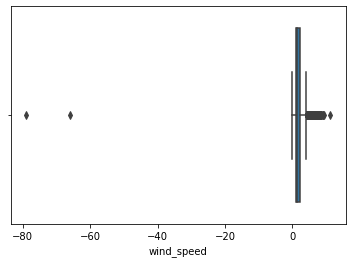

In [32]:
sns.boxplot(x=newdata['wind_speed'])

***Method-2 : we can also detect outlier using z score, but here we can find the exact value of outlier***
## Detecting outlier using Z score
### Using Z score : Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation. In this way I can find the outlier.
#### Formula for Z score = (Observation — Mean)/Standard Deviation

#### z = (X — μ) / σ

In [33]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [34]:
outlier_pt=detect_outliers(newdata['rain'])
outlier_pt

[10.7,
 3.3,
 7.6,
 8.9,
 3.2,
 3.8,
 3.6,
 4.0,
 16.0,
 5.7,
 11.7,
 21.0,
 10.1,
 3.2,
 6.4,
 4.4,
 12.1,
 6.6,
 3.6,
 11.2,
 3.0,
 4.1,
 3.0,
 3.1,
 9.8,
 8.8,
 4.5,
 3.3,
 3.8,
 14.7,
 10.6,
 3.6,
 6.0,
 3.6,
 72.5,
 6.8,
 6.0,
 3.2,
 3.9,
 8.6,
 4.0,
 10.9,
 3.1,
 3.3,
 3.5,
 7.0,
 7.3,
 11.5,
 3.3,
 11.6,
 8.2,
 6.6,
 5.4,
 4.6,
 7.8,
 14.6,
 4.1,
 40.7,
 7.5,
 23.6,
 23.3,
 6.5,
 6.1,
 4.4,
 26.8,
 3.8,
 6.4,
 3.2,
 8.0,
 5.2,
 3.4,
 11.3,
 10.7,
 12.9,
 13.6,
 3.7,
 6.4,
 6.5,
 4.7,
 4.2,
 3.6,
 3.7,
 5.0,
 4.6,
 11.7,
 3.5,
 3.5,
 3.0,
 5.2,
 3.7,
 3.5,
 3.2,
 3.9,
 9.9,
 4.8,
 5.3,
 9.6,
 33.7,
 3.7,
 15.4,
 3.2,
 3.3,
 9.5,
 29.3,
 7.9,
 7.2,
 5.2,
 17.8,
 33.1,
 6.9,
 5.9,
 4.7,
 7.3,
 5.2,
 3.3,
 4.3,
 6.9,
 36.6,
 10.9,
 4.0,
 13.4,
 6.3,
 3.2,
 4.1,
 3.4,
 3.8,
 5.7,
 4.3,
 4.9,
 3.1,
 3.7,
 6.9,
 3.7,
 3.9,
 17.9,
 5.3,
 4.0,
 7.1,
 4.1,
 3.5,
 3.6,
 5.3,
 13.8,
 23.7,
 24.1,
 20.3,
 17.8,
 20.2,
 9.0,
 16.4,
 3.8,
 17.7,
 18.3,
 17.6,
 7.6,
 3.2,
 15.3,
 3.8,
 12.1,
 5

In [35]:
# Trimming
# for i in outlier_pt:
#     if(i<31527):
#         a = np.delete(newdata['rain'] , np.where(newdata['rain']==i))
# print(a)

### Finding correlation between columns and plotting heatmap

In [36]:
# corr_year = newdata['year'].corr(other=newdata['month'])
corr_year = newdata.corr()
corr_year

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
year,1.000000,-0.197649,-0.008615,-0.007282,-0.007743,-0.056282,0.033708,0.005065,0.128271
month,-0.197649,1.000000,0.007352,0.009088,-0.004171,0.150864,0.005215,0.014098,-0.145393
day,-0.008615,0.007352,1.000000,0.000682,-0.001939,0.014955,0.000242,0.000179,-0.009207
hour,-0.007282,0.009088,0.000682,1.000000,0.001019,0.036295,-0.005175,0.002570,0.020341
PM2.5,-0.007743,-0.004171,-0.001939,0.001019,1.000000,-0.004342,-0.000333,0.007283,0.000798
temperature,-0.056282,0.150864,0.014955,0.036295,-0.004342,1.000000,-0.209460,0.033575,0.038405
pressure,0.033708,0.005215,0.000242,-0.005175,-0.000333,-0.209460,1.000000,-0.015272,0.013046
rain,0.005065,0.014098,0.000179,0.002570,0.007283,0.033575,-0.015272,1.000000,0.021387
wind_speed,0.128271,-0.145393,-0.009207,0.020341,0.000798,0.038405,0.013046,0.021387,1.000000


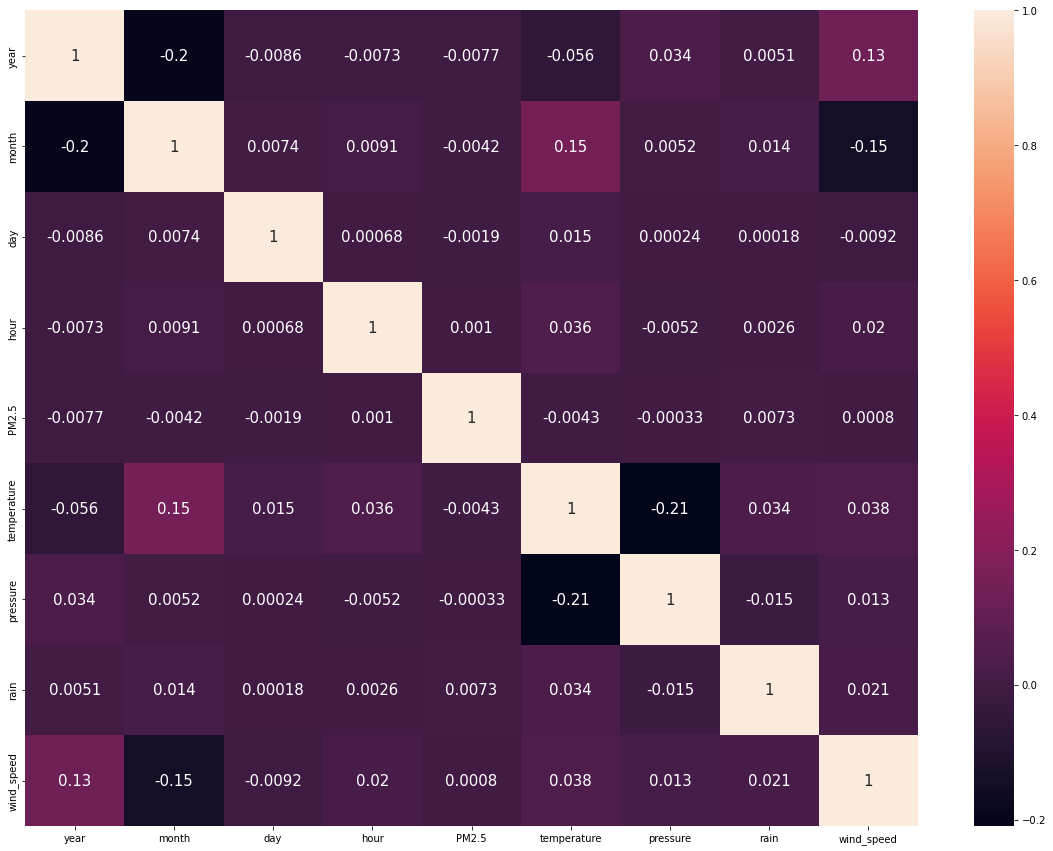

In [37]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

sns.heatmap(corr_year, annot=True, annot_kws={'size': 15}) # not using fmt, , fmt='.5g'

plt.show()

### Finding relationship between each column

In [38]:
# plt.bar(newdata['year'], newdata['month'])
# plt.show()

In [39]:
# plt.bar(newdata['day'], newdata['month'])
# plt.show()

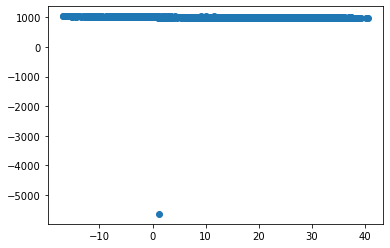

In [40]:
plt.scatter(newdata['temperature'], newdata['pressure'])
plt.show()

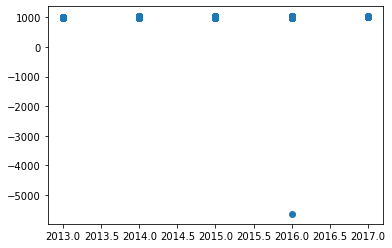

In [41]:
plt.scatter(newdata['year'], newdata['pressure'])

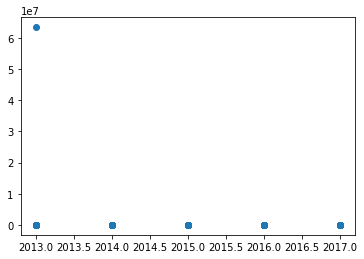

In [42]:
plt.scatter(newdata['year'], newdata['PM2.5'])

## Finding correlation of PM2.5 with others

In [43]:
corr_pm = newdata[['year', 'PM2.5']].corr()
# sns.heatmap(newdata[['PM2.5']].corr(other=newdata[['year']]))
corr_pm

,year,PM2.5
year,1.000000,-0.007743
PM2.5,-0.007743,1.000000


<AxesSubplot:>

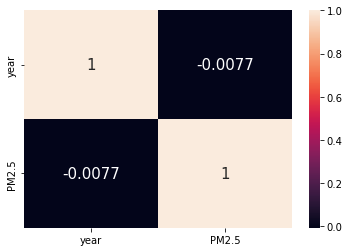

In [44]:
sns.heatmap(corr_pm, annot=True, annot_kws={'size': 15})

<AxesSubplot:>

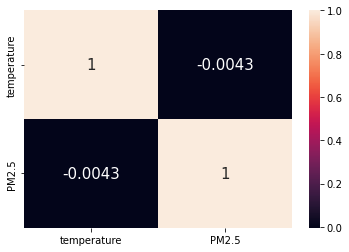

In [45]:
corr_pm_temp = newdata[['temperature', 'PM2.5']].corr()
sns.heatmap(corr_pm_temp, annot=True, annot_kws={'size': 15})

<AxesSubplot:>

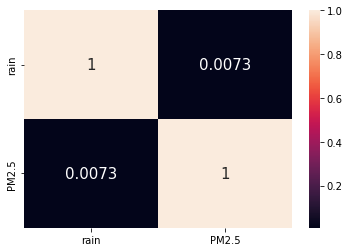

In [46]:
corr_pm_rain = newdata[['rain', 'PM2.5']].corr()
sns.heatmap(corr_pm_rain, annot=True, annot_kws={'size': 15})

**As we can see from above heatmaps, the correlation values of PM2.5 with other columns are very low. Therefore, it will be not affected by other columns or parameters**

# DAY 5-6
# Task:
Model training and evaluation.

As you already know that you have been provided with a dataset with attributes like PM2.5, wind speed etc, you may have already got an idea about what you have to do in the next task.

The dataset is of the weather condition of a particular place over some years, one hour at a time.

Your task is to predict the PM2.5 concentration on a test dataset.

The test dataset will be provided to you on Day 7.

Here are the tasks that you need to complete:-

1. Train atleast two models to predict PM2.5 and decide a the final model from the trained models for prediction.

2. For each model print it's accuracy(out of 100 in %)(r2 is preferred), the errors(mean squared, mean absolute etc).

3. Tell us why did you select a particular model for final prediction with stats/proofs to support your answer.

4. After finalising the model predict PM2.5 concentration on test dataset that you had made in test_train_split and plot a graph of actual vs predicted to show comparison and how accurately the model is predicting.  
        -Actual data is the values of PM2.5 in the test dataset that you have made.    
        -Predicted data is the values predicted by your finalized model.    

5. Explain the observation that you can make from the actual vs predicted graph.

6. Predict output on 10 different inputs and print them. These inputs are your inputs that you will give to the model after the model is fully trained and ready for deployment. The inputs values depends on you. You can take any input values.

7. Optimize your model as much as possible for better accuracy keeping in mind the case of underfitting and overfitting.


## Data Pre-processing

First we will do label encoding of wind_direction since it is of object dtype.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdata['wind_direction_N'] = le.fit_transform(newdata['wind_direction'])

In [48]:
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,wind_direction_N
0,2013.0,3.0,1.0,0.0,4.0,-0.7,1023.7,0.0,NNW,4.4,6
1,2013.0,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.0,3
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6,6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1,7
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8,1
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9,12
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0,11
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9,5


Now, let's extract or separate the values of other parameters (independent variables) with PM2.5 (dependent variable), which will help in training and testing.

In [49]:
X=newdata[[
    'year',
    'month',
    'day',
    'hour',
    'temperature',
    'pressure',
    'rain',
    'wind_speed',
    'wind_direction_N'
]]

y = newdata['PM2.5']

Using train_test_split, we have splitted the 25% of dataset, in which 75% data is training dataset and 25% testing.

In [50]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [51]:
X_train

,year,month,day,hour,temperature,pressure,rain,wind_speed,wind_direction_N
22362,2015.0,10.0,18.0,4.0,17.0,1018.8,0.0,2.4,4
3127,2013.0,7.0,9.0,12.0,25.0,998.2,2.1,0.7,4
26302,2016.0,4.0,2.0,10.0,15.6,1017.2,0.0,2.4,5
21092,2015.0,8.0,25.0,13.0,29.6,1005.4,0.0,2.7,7
6144,2013.0,11.0,12.0,9.0,11.6,1020.7,0.0,1.5,4
...,...,...,...,...,...,...,...,...,...
23841,2015.0,12.0,19.0,19.0,-1.2,1028.4,0.0,0.1,3
23080,2015.0,11.0,17.0,13.0,8.5,1022.8,0.0,1.6,5
29227,2016.0,8.0,6.0,5.0,26.4,1003.0,0.0,1.0,0
11138,2014.0,6.0,12.0,20.0,29.1,999.9,0.0,2.1,1


In [52]:
y_train

22362     80.0
3127      52.0
26302      8.0
21092      8.0
6144      68.0
         ...  
23841    165.0
23080     19.0
29227    120.0
11138     36.0
10416     96.0
Name: PM2.5, Length: 7882, dtype: float64

In [53]:
#feature Scaling  (which will make all the values in same range)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
# sc_y = StandardScaler()

X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [54]:
# from sklearn.linear_model import SGDRegressor

## Training and Fitting to the Training data

Now, using SVM regressor algorithm for trainig and fitting the model (which according to me is best from SGD regressor algo)

In [55]:
# clf = SGDRegressor(loss="squared_loss", penalty="l2", max_iter=5)
# clf = SGDRegressor()
# clf.fit(X_train, y_train)

from sklearn.svm import SVR # "Support vector Regressor"  
reg = SVR(kernel = 'rbf')  
reg.fit(X_train, y_train)  

SVR()

### WHY SVR?
### Beacause it creates easily a separation line or hyperplane between labels and features. Also SGD is good for linear regressors but SVR can also be used for non-linears, which is required here.

**Now predicting the value of PM2.5 and calculating the score(accuracy)**`

In [56]:
y_pred= reg.predict(X_test)  
y_pred

array([38.35935403, 68.02934645, 24.87833307, ..., 89.21204748,
       70.09344163, 81.51000602])

In [57]:
reg.score(X_test, y_test)

0.06791329820208769

In [58]:
# Y = SGDRegressor.predict(X_test)

In [59]:
# from sklearn.metrics import r2_score
# r2_score(X_test, y_test)

In [60]:
reg.score(X_test, y_test)*100

6.7913298202087695

## Actual vs Predicted values

In [61]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison)

       Actual  Predicted
19553    12.0  38.359354
16179   123.0  68.029346
21475     9.0  24.878333
24716    13.0  15.245359
4580    100.0  65.708944
...       ...        ...
13123    32.0  71.855360
19648   292.0  60.164885
9845     57.0  89.212047
10799    21.0  70.093442
2732     46.0  81.510006

[23645 rows x 2 columns]


## Actual vs Predicted Graph

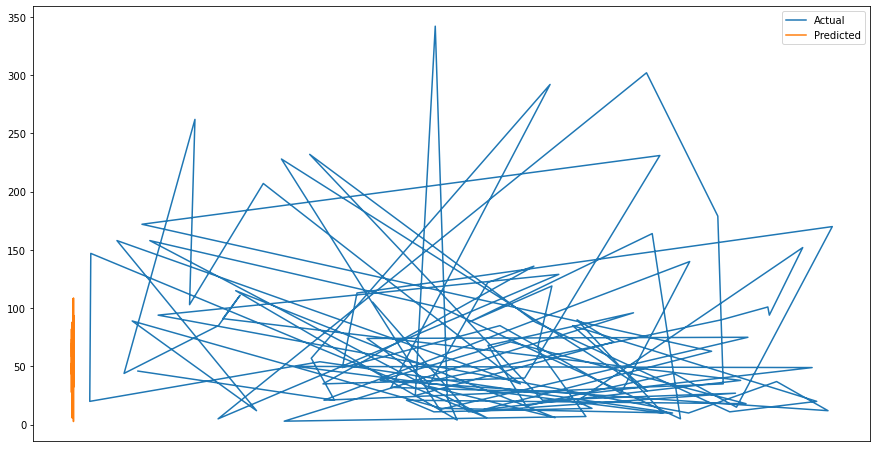

In [62]:
A = y_test
B = y_pred
plt.rcParams['figure.figsize'] = 15,8
plt.figure()
plt.plot(A[-100:], label="Actual")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.xticks(())
plt.show()

## Predicting on our own value of attributes

In [63]:
testSet = [[2015.0, 10.0, 18.0, 4.0, 17.0, 1018.8, 0.0, 2.4, 4]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:", reg.predict(test))

        0     1     2    3     4       5    6    7  8
0  2015.0  10.0  18.0  4.0  17.0  1018.8  0.0  2.4  4
predicted: [48.62904039]


## Evaluation of the model

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred)*100)

49.90932640569768
5881.666148921994
6.7913298202087695


# DAY-7
# Task:
Predict PM 2.5 value in all the rows of test dataset.

In column PM 2.5 fill the predicted values and then rename dataset to test-dataset-<your team name>.csv 

Upload the renamed dataset and code on GitHub. 

In [65]:
test = pd.read_csv("test_dataset.csv")
test.head(10)

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,30.6,1005.2,0.0,S,1.3,NaN
1,2016,8,5,11,31.1,1006.2,0.0,ENE,2.2,NaN
2,2016,8,5,12,31.5,1005.9,0.0,ESE,2.2,NaN
3,2016,8,6,4,26.8,1002.9,0.0,SW,0.2,NaN
4,2016,8,6,10,30.8,1002.4,0.0,ENE,1.1,NaN
5,2016,8,7,8,24.0,1004.5,3.2,ENE,2.1,NaN
6,2016,8,7,20,29.6,1004.6,0.0,S,0.9,NaN
7,2016,8,8,18,31.6,1003.9,0.0,SE,2.4,NaN
8,2016,8,9,4,21.9,1004.8,0.0,ENE,0.5,NaN
9,2016,8,9,8,27.0,1005.7,0.0,NE,1.3,NaN


In [66]:
test.isnull().sum()

year                 0
month                0
day                  0
hour                 0
temperature          9
pressure             9
rain                 9
wind_direction      38
wind_speed           4
PM2.5             2612
dtype: int64

In [67]:
test['temperature'].interpolate(method='linear', direction = 'both', inplace=True) 
test['pressure'].interpolate(method='linear', direction = 'both', inplace=True) 
test['rain'].interpolate(method='linear', direction = 'both', inplace=True) 
test["wind_speed"].fillna(test["wind_speed"].mean(),inplace=True)

In [68]:
index = test["wind_direction"]
index.value_counts()

NE     545
ENE    295
SW     242
NW     241
E      193
NNW    152
ESE    140
NNE    139
SE     128
N      110
WSW     91
S       73
SSW     67
SSE     62
W       51
WNW     45
Name: wind_direction, dtype: int64

In [69]:
test["wind_direction"] = test["wind_direction"].fillna("NE")

In [70]:
test.isnull().sum()

year                 0
month                0
day                  0
hour                 0
temperature          0
pressure             0
rain                 0
wind_direction       0
wind_speed           0
PM2.5             2612
dtype: int64

In [71]:
label=le.fit_transform(test["wind_direction"])
test["wind_direction"]=label
test["wind_direction"].value_counts()

4     583
1     295
12    242
7     241
0     193
6     152
2     140
5     139
9     128
3     110
15     91
8      73
11     67
10     62
13     51
14     45
Name: wind_direction, dtype: int64

In [72]:
X= test.copy()

X=X.drop(columns=["PM2.5"])
X=X.reindex(["year","month","day","hour", "wind_speed","wind_direction","pressure",'rain',"temperature"],axis=1)
X

,year,month,day,hour,wind_speed,wind_direction,pressure,rain,temperature
0,2016,8,2,21,1.3,8,1005.2,0.0,30.6
1,2016,8,5,11,2.2,1,1006.2,0.0,31.1
2,2016,8,5,12,2.2,2,1005.9,0.0,31.5
3,2016,8,6,4,0.2,12,1002.9,0.0,26.8
4,2016,8,6,10,1.1,1,1002.4,0.0,30.8
...,...,...,...,...,...,...,...,...,...
2607,2017,2,28,19,2.4,7,1013.5,0.0,12.5
2608,2017,2,28,20,0.9,14,1013.6,0.0,11.6
2609,2017,2,28,21,1.1,7,1014.2,0.0,10.8
2610,2017,2,28,22,1.2,6,1014.4,0.0,10.5


In [73]:
Y= reg.predict(X)

In [74]:
test["PM2.5"]=Y.astype("int")

In [75]:
test.to_csv("test_predicted.csv")

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2612 non-null   int64  
 1   month           2612 non-null   int64  
 2   day             2612 non-null   int64  
 3   hour            2612 non-null   int64  
 4   temperature     2612 non-null   float64
 5   pressure        2612 non-null   float64
 6   rain            2612 non-null   float64
 7   wind_direction  2612 non-null   int32  
 8   wind_speed      2612 non-null   float64
 9   PM2.5           2612 non-null   int32  
dtypes: float64(4), int32(2), int64(4)
memory usage: 183.8 KB


# Day 8 - Day 9: Deployment and pushing the code on GitHub

## TASK
Deploy your model on web using flask. We have provided the resources for the same. 
The page should consist input boxes/entries and then will display the Predicted value on the same page.

Keep in mind that there should be entries for all the columns.

The deadline for the task is 21 September 8 AM.

You should upload the code for the deployment and the link of the web page where you have deployed the model.


In [77]:
import pickle
filename='model.pkl'
pickle.dump(reg, open(filename, 'wb'))